## 衝撃波菅の厳密解

こちらが厳密解を解くためのプログラム部分です。

### ■ 領域1 $ x>x_{0}+V_{s}t$
$\rho_{1}=\rho_{R}$, $p_{1}=p_{R}$, $u_{1}=u_{R}$

衝撃波速度$ V_{s}=u_{1}+c_{1}\sqrt{\frac{\gamma + 1}{2\gamma}\big(\frac{p_{2}}{p_{1}-1}+1\big)}$

### ■ 領域2 $ x_{0}+V_{c}t < x \leq x_{0}+V_{s}t$

衝撃波の前後でランキン・ユゴニオの関係式より、$\frac{\rho_{2}}{\rho_{R}}=\frac{\frac{p_{2}}{p_{R}}+\frac{\gamma-1}{\gamma+1}}{\frac{\gamma-1}{\gamma+1}\frac{p_{2}}{p_{R}}+1}$

$u_{2}=u_{R}+\frac{c_{R}\big(\frac{p_{2}}{p_{R}}-1\big)}{\sqrt{\frac{\gamma}{2}\big(\gamma-1+\frac{p_{2}}{p_{R}}(\gamma+1)\big)}}$

### ■ 領域3 $x_{0}+V_{rt}t < x \leq x_{0}+V_{c}t$ $(V_{rt}=u_{2}-\frac{\gamma-1}{2}(u_{L}-u_{2})+c_{L})=u_{3}-c_{3}$

等エントロピー過程よりポアソンの関係式を使って、$p_{3}\rho_{3}^{\gamma}=p_{L}\rho_{L}^{\gamma}$,流速と圧力は変化がないので$u_{3}=u_{2}=V_{c}$, $p_{3}=p_{2}$
$c_{3}=\sqrt{\frac{\gamma p_{3}}{\rho_{3}}}=\frac{\gamma-1}{2}(u_{L}-u_{3})+c_{L}$

### ■ 領域4 $x_{0}+V_{rh}t < x \leq x_{0}+V_{rt}t$

流速$u_{4}=\frac{2}{\gamma+1}\big(\frac{x-x_{0}}{t}+c_{L}+\frac{\gamma-1}{2}u_{L}\big)$

音速$c_{4}=c_{L}-\frac{\gamma-1}{2}(u_{4}-u_{L})$

等エントロピー過程よりポアソンの関係式を使って、$p_{4}\rho_{4}^{\gamma}=p_{L}\rho_{L}^{\gamma}$ or $p_{4}c_{4}^{\frac{2\gamma}{\gamma-1}}=p_{L}c_{L}^{\frac{2\gamma}{\gamma-1}}$

#### ■ 領域5 $x\leq x_{0}+V_{rh}t$

$p_{5}=p_{L}$, $u_{5}=u_{L}$, $\rho_{5}=\rho_{L}$


まずは$\frac{p_{2}}{p_{1}}=p_{21}$を求めるための反復計算を行っています。
\begin{align*}
\frac{p_{2}}{p_{1}}=\frac{p_{R}}{p_{L}}\bigg(\,\,\,1+ \frac{\gamma-1}{2c_{L}}\bigg(u_{L}-u_{R}-\frac{c_{R}(\frac{p_{2}}{p_{1}}-1)}{\gamma\sqrt{\frac{\gamma+1}{2\gamma}}(\frac{p_{2}}{p_{1}}-1)+1}\bigg)\,\,\,\bigg)^{\frac{2\gamma}{\gamma-1}}
\end{align*}は

```python
# p21を求めるための関数
def F(p21, p1, p5, rho1, rho5, u1, u5):
    # c1, c5, w
    c1 = np.sqrt(gamma*p1/rho1)
    c5 = np.sqrt(gamma*p5/rho5)
    ....

```

の関数から求めています。

※理想気体の状態方程式から、温度と密度と圧力は$p=\rho R_{MW} T$ 

ただし、$R_{MW}$は気体定数$R=8.31$[J/k mol]とモル質量$MW=28.9$[ mol ](空気のモル質量)から、$R_{MW}=\frac{R}{MW}$で計算される値であることに注意

In [3]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
gamma = 1.4
XL = -5.0
XR = 5.0
tstop = 0.007
dt = 1e-3
t = 0
i_max = 100
dx = (XR - XL) / i_max
x = np.zeros(i_max)
rhoe = np.zeros(i_max)
pe = np.zeros(i_max)
ue = np.zeros(i_max)
tempe = np.zeros(i_max)

x0 = 0 #初期区切り位置
R = 8.31446262  #[mol/J K]
MW = 28.96/1000 #[kg/mil]
Rmw = R/MW

# 初期状態1
p1 = 10000#0.1
T1 = 278.746
rho1 = p1/(Rmw*T1)#0.12
u1 = 0.0
c1 = np.sqrt(gamma * p1 / rho1)
if t == 0: print(f"初期状態 rho1={rho1}")

# 初期状態5
T5 = 348.432
p5 = 100000#1.0
rho5 = p5/(Rmw*T5)#1.0
u5 = 0.0
c5 = np.sqrt(gamma * p5 / rho5)
if t == 0: print(f"初期状態 rho5={rho5}")
 
for i in range(i_max):
    x[i] = XL + dx*i       # セル境界の座標

    # 高圧、高温
    if x[i] < x0: 
        rhoe[i] = rho5
        pe[i] = p5
        ue[i] = u5
        tempe[i] = pe[i]/(rhoe[i]*Rmw)
        
    # 低圧、低温
    else:
        rhoe[i] = rho1
        pe[i] = p1
        ue[i] = u1

#温度の計算    
tempe[i] = pe[i]/(rhoe[i]*Rmw)

# p21を求めるための関数
def F(p21, p1, p5, rho1, rho5, u1, u5):
    # c1, c5, w
    c1 = np.sqrt(gamma*p1/rho1)
    c5 = np.sqrt(gamma*p5/rho5)
 
    w = p5/ p1*(
        1.0 + (gamma - 1)/ c5 / 2.0
        * (u5 - u1 - c1 / gamma * (p21 - 1.0)
        * (
                (gamma + 1.0) / (2.0*gamma) * (p21 - 1.0) + 1.0
            )**(-1.0 / 2.0)
                
        )
        
        )**(2 * gamma / (gamma - 1))  - p21
    return w

def exact_solution(t):
    #Secant反復法により、衝撃波前後の圧力ジャンプを求める
    p21 = p1 / p5
    pm = p21 + 0.01
    pmm = pm + 0.01
    fmm = F(pm, p1, p5, rho1, rho5, u1, u5)
    itmax = 20                                    # 反復回数の上限
    it = 0
    eps = 1.e-5                                   # 収束判定条件
    error = 1

    while error > eps:
        it += 1
        fm = F(p21, p1, p5, rho1, rho5, u1, u5)
        df = fm - fmm
        p21 = p21 - (p21 - pmm) * fm / (df + 1.0e-8 * df / (abs(df) + 1.0e-8))
        error = abs(p21 - pm) / pm
        pmm = pm
        pm = p21
        fmm = fm
        #printf("反復回数=%d,p21=%f\n",it, p21);

        if (it >= itmax):
            break
    
    #print(f"p21={p21}")

    #領域2の物理量を計算する
    rho2 = rho1 * (p21 + (gamma - 1) / (gamma + 1))/((gamma - 1) * p21 / (gamma + 1) + 1)
    u2 = u1 + c1 * np.sqrt(2.0 / gamma) * (p21 - 1) /np.sqrt(gamma - 1 + p21 * (gamma + 1))
    p2 = p21 * p1
    #print(f"rho2={rho2},u2={u2},p2={p2}")

    #領域3の物理量を計算する
    u3 = u2
    p3 = p2
    rho3 = rho5 * pow(p3 / p5, 1.0 / gamma)
    c3 = np.sqrt(gamma * p3 / rho3)
    #print(f"rho3={rho3},u3={u3},p3={p3}")

    # 各波の速度を計算する
    Vs = u1 + c1 * np.sqrt((gamma + 1) / (2. * gamma) * (p21 - 1) + 1) # 衝撃波
    Vc = u3                                          # 接触不連続
    Vrt = u3 - c3                                   # 膨張波末端の速度
    Vrh = u5 - c5                                   # 膨張波先端の速度
    #print(f"Vs={Vs},Vc={Vc},Vrt={Vrt},,Vrh={Vrh}")
#
    # t時刻における波の位置を計算する
    xs = x0 + Vs * t                                 # 衝撃波
    xc = x0 + Vc * t                                 # 接触不連続
    xrt = x0 + Vrt * t                               # 膨張波末端の速度
    xrh = x0 + Vrh * t                               # 膨張波先端の速度
    #print(f"xs={xs},xc={xc},xrt={xrt},xrh={xrh}")

    # 計算格子に解を与える
    for i in range(i_max):
        # 領域5
        if x[i] < xrh:
            rhoe[i] = rho5
            pe[i] = p5
            ue[i] = u5
            
        # 領域4
        elif x[i] <= xrt:
            ue[i] = 2. / (gamma + 1) * (0.5 * (gamma - 1) * u5 + c5 + (x[i] - x0) / t)
            c4 = c5 - 0.5 * (gamma - 1) * (ue[i] - u5)
            pe[i] = p5 * pow(c4 / c5, (2. * gamma / (gamma - 1)))
            rhoe[i] = rho5 * pow(pe[i] / p5, 1.0 / gamma)
        

        # 領域3
        elif (x[i] < xc):
            rhoe[i] = rho3
            pe[i] = p3
            ue[i] = u3

        # 領域2
        elif (x[i] < xs):
            rhoe[i] = rho2
            pe[i] = p2
            ue[i] = u2
        
        # 領域1
        else:
            rhoe[i] = rho1
            pe[i] = p1
            ue[i] = u1
    
    # 温度の計算
    tempe = pe/(rhoe*Rmw)

    return rhoe, pe, ue, tempe

初期状態 rho1=0.1249556012019438
初期状態 rho5=0.9996462441060816


以上のプログラムを使って各時刻の物理量を求める

In [5]:
# 初期化
rhoet = [rhoe]
pet = [pe]
uet = [ue]
tempet = [tempe]

t = 0
while t <= tstop:
    t = t + dt
    
    rhoe = np.zeros(i_max)
    pe = np.zeros(i_max)
    ue = np.zeros(i_max)
    
    rhoe, pe, ue, tempe = exact_solution(t)
    rhoet.append(rhoe)
    pet.append(pe)
    uet.append(ue)
    tempet.append(tempe)

密度のグラフを作成

MovieWriter imagemagick unavailable; using Pillow instead.


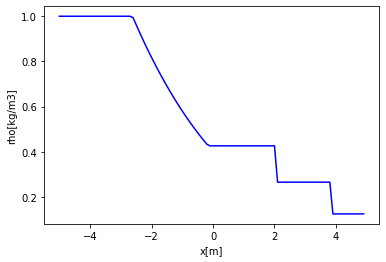

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(XL, XR, dx)

# アニメーション
ims_rho = []
it = 0
t = 0

while t <= tstop:
    im_rho = plt.plot(x, rhoet[it], "b")
    ims_rho.append(im_rho)
    plt.xlabel("x[m]")
    plt.ylabel("rho[kg/m3]")
    t = t + dt
    it += 1

ani_rho = animation.ArtistAnimation(fig, ims_rho, interval=1)
ani_rho.save('rho.gif', writer='imagemagick')

流速のグラフを作成

MovieWriter imagemagick unavailable; using Pillow instead.


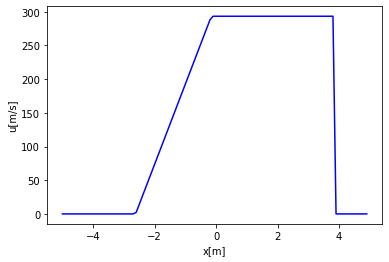

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(XL, XR, dx)

# アニメーション
ims_u = []
it = 0
t = 0
while t <= tstop:
    im_u = plt.plot(x, uet[it], "b")
    ims_u.append(im_u)
    
    plt.xlabel("x[m]")
    plt.ylabel("u[m/s]")
    
    t = t + dt
    it += 1

ani_u = animation.ArtistAnimation(fig, ims_u, interval=1)
ani_u.save('u.gif', writer='imagemagick')

圧力のグラフを作成

MovieWriter imagemagick unavailable; using Pillow instead.


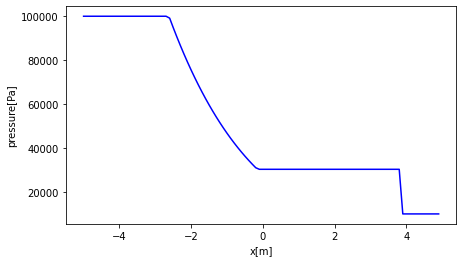

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(7,4))
x = np.arange(XL, XR, dx)

# アニメーション
ims_p = []
it = 0
t = 0
while t <= tstop:
    im_p = plt.plot(x, pet[it], "b")
    plt.xlabel("x[m]")
    plt.ylabel("pressure[Pa]")
    ims_p.append(im_p)
    t = t + dt
    it += 1

ani_p = animation.ArtistAnimation(fig, ims_p, interval=1)
ani_p.save('pe.gif', writer='imagemagick')

温度のグラフを作成

MovieWriter imagemagick unavailable; using Pillow instead.


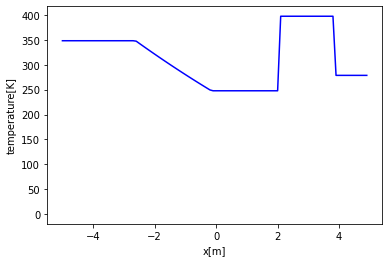

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(XL, XR, dx)

# アニメーション
ims_t = []
it = 0
t = 0
while t <= tstop:
    im_t = plt.plot(x, tempet[it], "b")
    plt.xlabel("x[m]")
    plt.ylabel("temperature[K]")
    ims_t.append(im_t)
    t = t + dt    
    it += 1

ani_t = animation.ArtistAnimation(fig, ims_t, interval=1)
ani_t.save('tempe.gif', writer='imagemagick')

以上の結果をOpenFOAMと比較を行うためにcsvファイルとして出力しておく

In [10]:
it = 0
t = 0

cols=["#x[m]", "temp[K]", "p[Pa]", "rho[kg/m3]", "u[m/s]"]
while t <= tstop:
    time = round(t,4)
    if time>0 and time%0.0010 == 0:
        df = pd.DataFrame([x ,tempet[it],  pet[it], rhoet[it], uet[it],]).T
        df.columns = cols
        df.to_csv(f"time{round(t,3)}.csv", index=False, sep='\t')
    t = t + dt
    it += 1

# OpenFOAMとの比較

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

fig = plt.figure()
x = np.arange(XL, XR, dx)

# OpenFOAMのデータフレーム作成関数
def df_cae_func(time_):
    datafilename = "x_sec_T_mag(U)_p_rho.xy"
    filenamepath = f"../shockTube/postProcessing/sampleDict/{time_}/{datafilename}"
    cols = ["x[m]", "T[K]", "U[m/s]", "p[Pa]", "rho[kg/m3]"]
    df_cae = pd.read_table(filenamepath, names=cols)
    return df_cae

# アニメーション
ims_rho_exp_cae = []
it = 0
t = 0
df_cae = pd.DataFrame()
while t <= tstop-dt:
    time = round(t,4)
    if time>0 and time%0.0010 == 0:
        if time == 0.0070:
             # 理論解    
            im_rho = plt.plot(x, rhoet[it], color="black",label="Theory")

            # OpenFOAM
            df_cae = df_cae_func(time)
            im_rho_cae = plt.plot(df_cae["x[m]"].values, df_cae["rho[kg/m3]"].values, color="red", label="OpenFOAM")
        else: 
            # 理論解    
            im_rho = plt.plot(x, rhoet[it], color="black")

            # OpenFOAM
            df_cae = df_cae_func(time)
            im_rho_cae = plt.plot(df_cae["x[m]"].values, df_cae["rho[kg/m3]"].values, color="red")#, label="OpenFOAM")
        
        ims_rho_exp_cae.append(im_rho + im_rho_cae)

    t = t + dt
    it += 1

plt.xlabel("x[m]", fontsize=12)
plt.ylabel("rho[kg/m3]", fontsize=12)
plt.legend()
ani_rho = animation.ArtistAnimation(fig, ims_rho_exp_cae, interval=1)#, repeat_delay=1000)
ani_rho.save('rho_exp_cae.gif', writer='imagemagick')

NameError: name 'XL' is not defined

<Figure size 432x288 with 0 Axes>